In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# option so we can always see all columns
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('real_estate_withheaders.csv', sep = ';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21597 non-null  int64 
 1   date           21597 non-null  object
 2   bedrooms       21597 non-null  int64 
 3   bathrooms      21597 non-null  object
 4   sqft_living    21597 non-null  int64 
 5   sqft_lot       21597 non-null  int64 
 6   floors         21597 non-null  object
 7   waterfront     21597 non-null  int64 
 8   view           21597 non-null  int64 
 9   condition      21597 non-null  int64 
 10  grade          21597 non-null  int64 
 11  sqft_above     21597 non-null  int64 
 12  sqft_basement  21597 non-null  int64 
 13  yr_built       21597 non-null  int64 
 14  yr_renovated   21597 non-null  int64 
 15  zipcode        21597 non-null  int64 
 16  lat            21597 non-null  object
 17  long           21597 non-null  object
 18  sqft_living15  21597 non-n

In [7]:
#if categories were dominant then i would think the chi squared test 

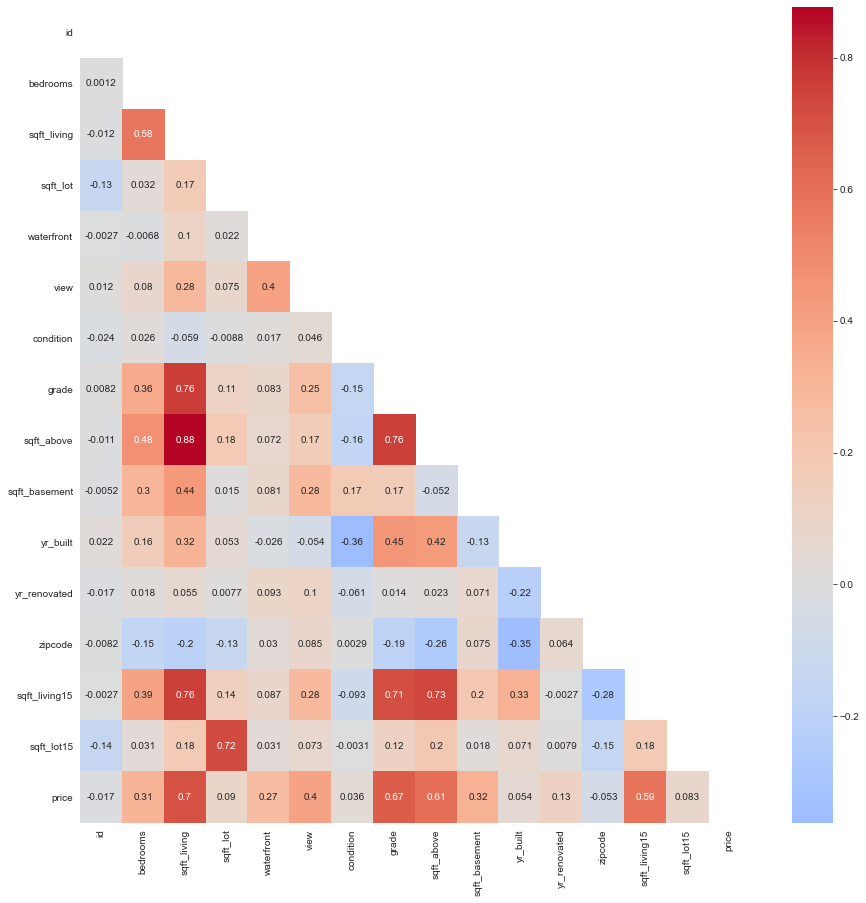

In [8]:
fig, ax = plt.subplots(figsize=(15,15))

mask=np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', center=0)

plt.show()

In [9]:
#corr matrix with absolute numbers 
corr_matrix =df.corr().abs()

In [10]:
price_impact = corr_matrix['price']

In [11]:
price_impact.sort_values(ascending=True)

id               0.016772
condition        0.036056
zipcode          0.053402
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
waterfront       0.266398
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [12]:
df=df.drop(columns=['id','long','sqft_above'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           21597 non-null  object
 1   bedrooms       21597 non-null  int64 
 2   bathrooms      21597 non-null  object
 3   sqft_living    21597 non-null  int64 
 4   sqft_lot       21597 non-null  int64 
 5   floors         21597 non-null  object
 6   waterfront     21597 non-null  int64 
 7   view           21597 non-null  int64 
 8   condition      21597 non-null  int64 
 9   grade          21597 non-null  int64 
 10  sqft_basement  21597 non-null  int64 
 11  yr_built       21597 non-null  int64 
 12  yr_renovated   21597 non-null  int64 
 13  zipcode        21597 non-null  int64 
 14  lat            21597 non-null  object
 15  sqft_living15  21597 non-null  int64 
 16  sqft_lot15     21597 non-null  int64 
 17  price          21597 non-null  int64 
dtypes: int64(14), object(4)
me

# feature engineering 

In [14]:
df['date'][5]

'12/5/14'

In [15]:
df['month']=pd.DatetimeIndex(df['date']).month
#df['quarter']

In [16]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,month
0,13/10/14,3,1,1180,5650,1,0,0,3,7,0,1955,0,98178,"47,5112",1340,5650,221900,10
1,9/12/14,3,"2,25",2570,7242,2,0,0,3,7,400,1951,1991,98125,"47,721",1690,7639,538000,9
2,25/2/15,2,1,770,10000,1,0,0,3,6,0,1933,0,98028,"47,7379",2720,8062,180000,2
3,9/12/14,4,3,1960,5000,1,0,0,5,7,910,1965,0,98136,"47,5208",1360,5000,604000,9
4,18/2/15,3,2,1680,8080,1,0,0,3,8,0,1987,0,98074,"47,6168",1800,7503,510000,2


In [17]:
#seattle - its very grey and rainy in the winter - summer price bubble ? 

def season(x):
    if x<4:
        return 'winter'
    elif x<10:
        return 'summer'
    else:
        return 'winter'

In [18]:
df['season']=list(map(season, df['month']))

In [19]:
df=df.drop(columns=['date','month'])

In [20]:
#year built - more useful to know the age of the property - bucketed into age groups 
#- 3 clusters, pre 1930, pre 1980 and post 1980
df['yr_built'][1]

1951

In [21]:
def era(x):
    if x<1938:
        return 'prewar'
    elif x<1980:
        return 'the_rest'
    else:
        return 'new_homes'

df['built_era']=list(map(era, df['yr_built']))

In [22]:
df['age']=2015-df['yr_built']

In [23]:
df=df.drop(columns=['yr_built'])

In [24]:
#other columns - yr renovated, view, waterfront, basement 

In [25]:
round((df['yr_renovated']!=0).sum()/sum(df['yr_renovated'].value_counts())*100,2)

4.23

In [26]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [27]:
def boolean(x):
    if x == 0:
        n = 0
    elif x > 0:
        n = 1
    return n
#generic apply to any column we want to turn into a true false 
#or use astype(bool)
#maybe combine the era with the yr renovated - to classify the value of the renovation - sians homework 

In [28]:
df['renovated']=df['yr_renovated'].apply(boolean).astype('bool') #new
df['view']=df['view'].apply(boolean).astype('bool')#overwrite
df['sqft_basement']=df['sqft_basement'].apply(boolean).astype('bool')#overwrite

In [29]:
for c in df.columns.tolist():
    print(c, len(df[c].unique()))

bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 2
condition 5
grade 11
sqft_basement 2
yr_renovated 70
zipcode 70
lat 5033
sqft_living15 777
sqft_lot15 8682
price 3622
season 2
built_era 3
age 116
renovated 2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       21597 non-null  int64 
 1   bathrooms      21597 non-null  object
 2   sqft_living    21597 non-null  int64 
 3   sqft_lot       21597 non-null  int64 
 4   floors         21597 non-null  object
 5   waterfront     21597 non-null  int64 
 6   view           21597 non-null  bool  
 7   condition      21597 non-null  int64 
 8   grade          21597 non-null  int64 
 9   sqft_basement  21597 non-null  bool  
 10  yr_renovated   21597 non-null  int64 
 11  zipcode        21597 non-null  int64 
 12  lat            21597 non-null  object
 13  sqft_living15  21597 non-null  int64 
 14  sqft_lot15     21597 non-null  int64 
 15  price          21597 non-null  int64 
 16  season         21597 non-null  object
 17  built_era      21597 non-null  object
 18  age            21597 non-n

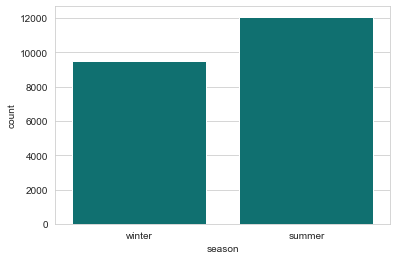

In [31]:
sns.countplot(x=df['season'], color="teal");

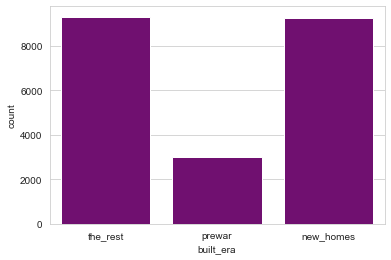

In [32]:
sns.countplot(x=df['built_era'], color="purple");

# Correlation and distribution of all numeric columns 

In [33]:
numerical= df.select_dtypes(include='number')

In [34]:
numerical.head()

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,age
0,3,1180,5650,0,3,7,0,98178,1340,5650,221900,60
1,3,2570,7242,0,3,7,1991,98125,1690,7639,538000,64
2,2,770,10000,0,3,6,0,98028,2720,8062,180000,82
3,4,1960,5000,0,5,7,0,98136,1360,5000,604000,50
4,3,1680,8080,0,3,8,0,98074,1800,7503,510000,28


In [35]:
numerical.corr(method='pearson').sort_values(['price'], ascending=False)['price'][1:10]

sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
bedrooms         0.308787
waterfront       0.266398
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
Name: price, dtype: float64

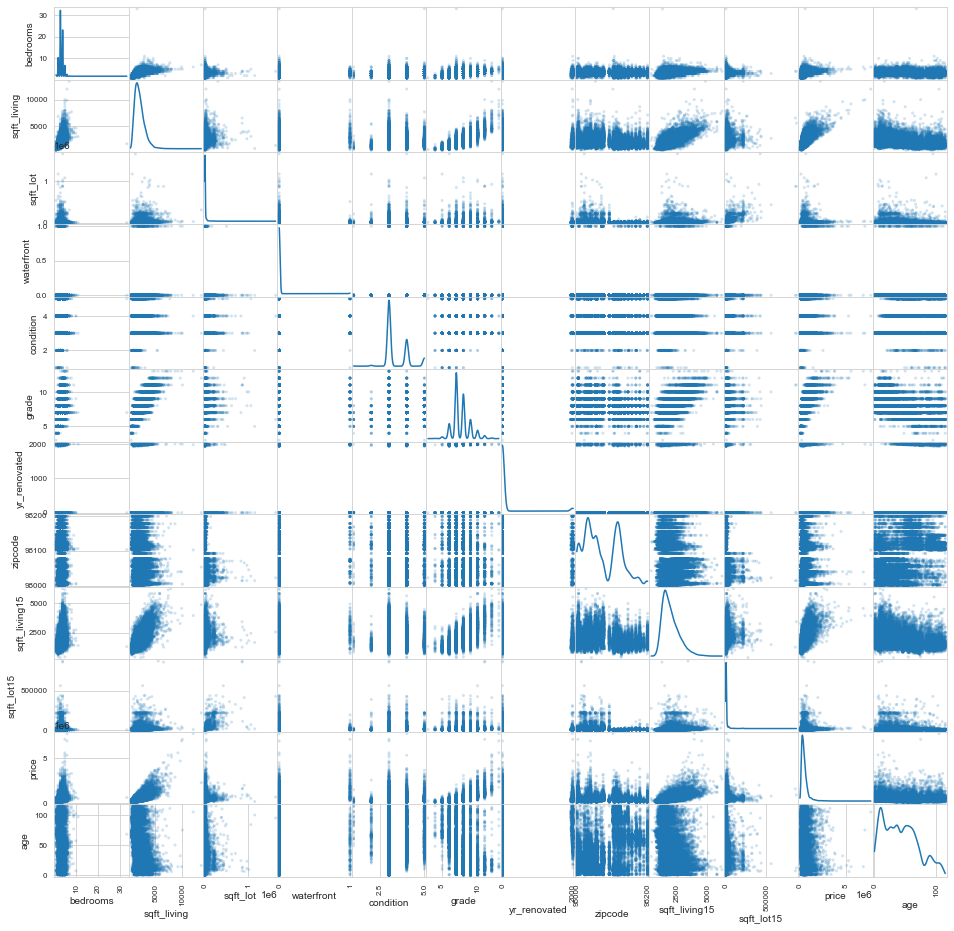

In [36]:
pd.plotting.scatter_matrix(numerical, alpha=0.2, figsize=(16,16), grid=True, diagonal='kde');

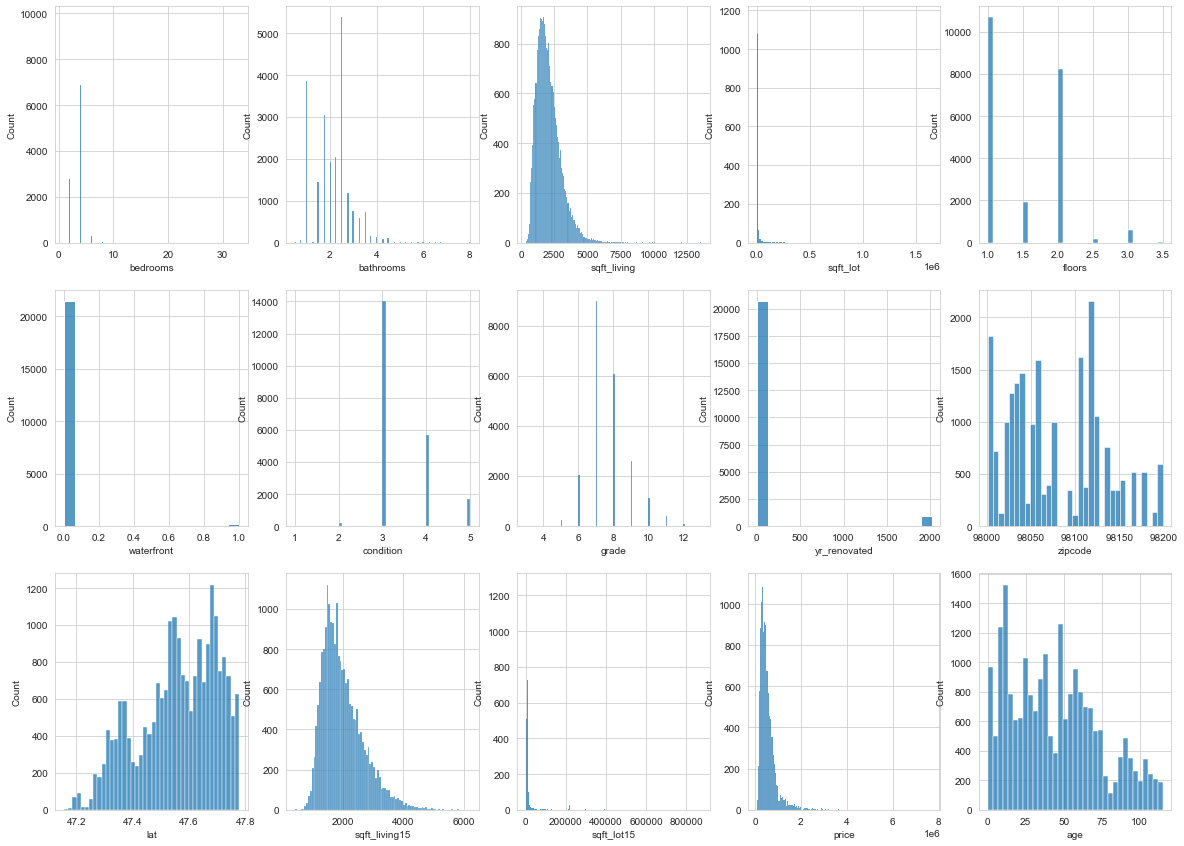

In [34]:
plt.figure(figsize=(20,20))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(numerical[column]);

### in depth questions 

In [37]:
#is there a summer price hike ? 
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [38]:
df_waterfront=df[df['waterfront'] == 1]


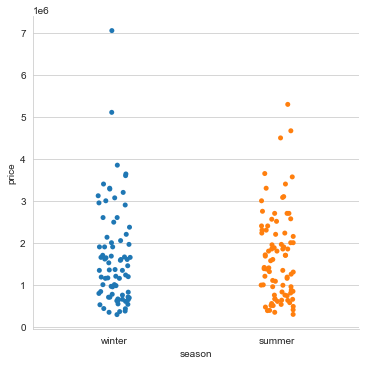

In [39]:
sns.catplot(x="season", y="price", data=df_waterfront);

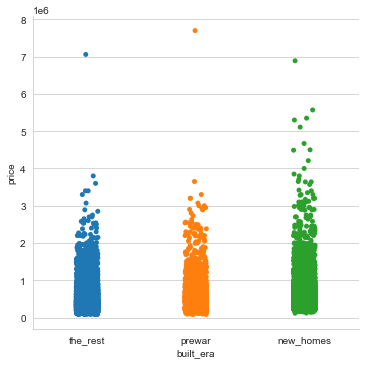

In [40]:
#does era have a strong impact on price ? 
sns.catplot(x="built_era", y="price", data=df);

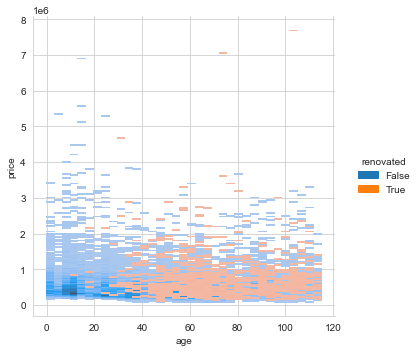

In [41]:
#what about age 

sns.displot(y="price", x="age",hue='renovated',data=df);

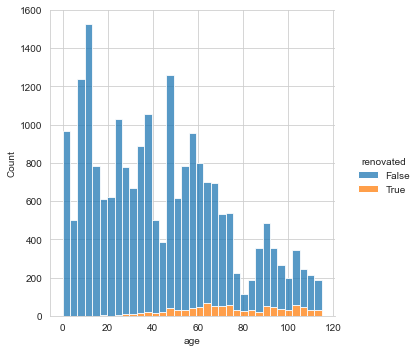

In [42]:
#dive into age and if renovated 
sns.displot(x="age",hue='renovated',data=df,multiple="stack");

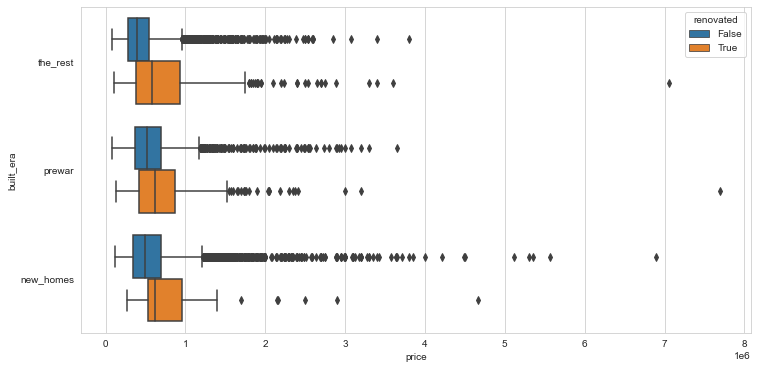

In [43]:
#sians homework, analyse era against renovated y/n 
plt.figure(figsize=(12,6)) 
sns.boxplot(y="built_era", x="price", hue="renovated",data=df);